In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\liver.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'],inplace=True)
data.isnull().sum()

Age                             0
Gender                          0
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkaline_Phosphotase            0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio    583
Dataset                         0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender']= lc.fit_transform(data['Gender'])

In [9]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.000000


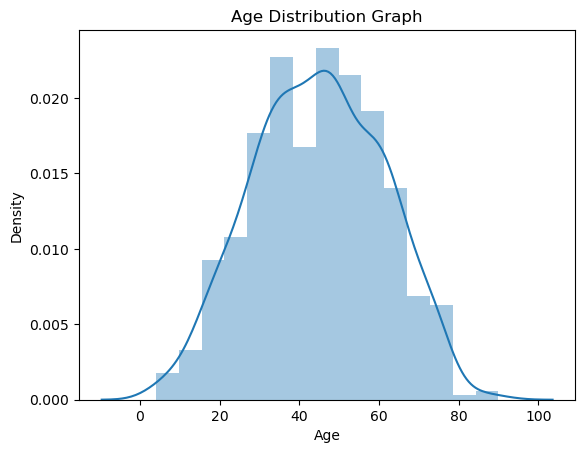

In [10]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

<AxesSubplot:xlabel='Total_Protiens', ylabel='count'>

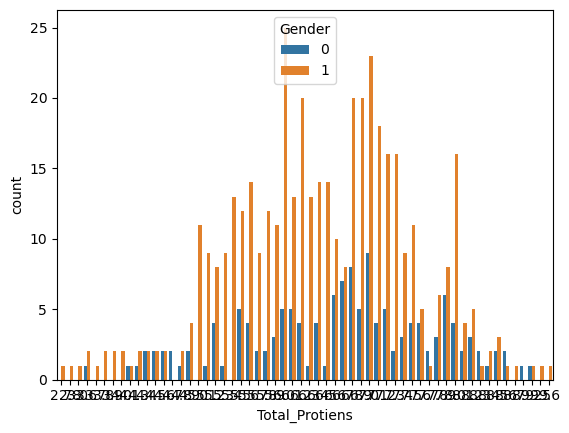

In [11]:
sns.countplot(data['Total_Protiens'], hue=data['Gender'])

<AxesSubplot:>

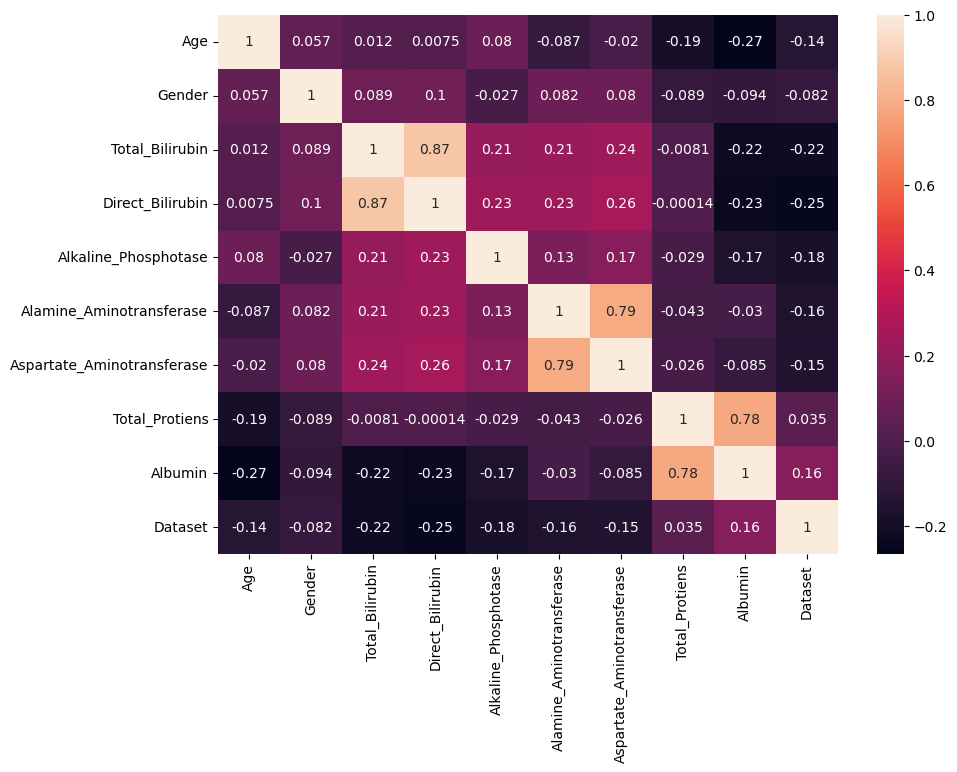

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [13]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(data), columns=data.columns)

In [14]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,NaN,-0.633595
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,NaN,-0.633595
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,NaN,-0.633595
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,NaN,-0.633595
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,NaN,-0.633595


In [15]:
X=data.iloc[:,:-1]
Y=data.Total_Protiens

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.2, random_state=42)

In [17]:
pip install imblanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblanced-learn (from versions: none)
ERROR: No matching distribution found for imblanced-learn


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [19]:
X.shape

(583, 10)

In [20]:
Y.shape

(583,)

In [21]:
X_train.value_counts()

Series([], dtype: int64)

In [22]:
Y_train.value_counts()

6.0    25
7.0    24
6.8    24
6.9    21
6.2    20
7.1    19
5.6    17
8.0    16
7.3    15
6.4    14
7.2    14
7.5    13
5.5    13
6.6    13
6.3    13
6.1    12
6.7    12
6.5    11
5.8    11
7.4    10
5.2    10
7.9    10
5.0    10
7.6     9
5.9     9
5.4     8
5.1     8
5.7     8
7.8     7
5.3     7
8.2     6
4.9     6
8.1     5
4.6     4
8.4     3
8.6     3
4.4     3
4.3     3
8.3     3
8.5     3
4.0     2
3.6     2
3.9     2
9.2     2
7.7     2
4.5     2
4.8     2
2.7     1
8.9     1
3.8     1
4.1     1
3.7     1
2.8     1
4.7     1
9.6     1
8.7     1
9.5     1
Name: Total_Protiens, dtype: int64

In [23]:
X_train_smote,Y_train_smote = smote.fit_resample(X_train,Y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
Y_train_smote.value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_smote, Y_train_smote)
Y_predict=model1.predict(X_test)
rfc1=accuracy_score(Y_test,Y_predict)
rfc1
pd.crosstab(Y_test, Y_predict)
print(classification_report(Y_test, Y_predict))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_smote, Y_train_smote)
Y_predict=model4.predict(X_test)
dtc1=accuracy_score(Y_test,Y-predict)
dtc1
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test, Y_predict))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train_smote, Y_train_smote)
Y_predict = model2.predict(X_test)
knn1=(accuracy_score(Y_test, Y_predict))
knn1
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test, Y_predict))

In [ ]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train_smote, Y_train_smote)
Y_predict=model5.predict(X_test)
logi1=accuracy_score(Y_test, Y_predict)
logi1
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test, Y_predict))

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=100, activation='relu', input_dim=10))

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(X_train, Y_train, batch_size=100, validation_split=0.2, epochs=100)

In [ ]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

In [ ]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

In [ ]:
classifier.save("liver.h5")

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred

In [ ]:
def predict_exit(sample_value):
    sample_value = np.array(sample-value)
    sample_value = sample_value.reshape(1, -1)
    sample_value = scale(sample_value)
    return classifier.predict(sample_value)

In [ ]:
sample_value = [[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
    print('Prediction: Liver patient')
else:
    print('Prediction: Healthy')

In [ ]:
acc_smote= [['KNN Classifier', knn1], ['RandomForestClassifier', rfc1], ['DecisionTreeClassifier', dtc1], ['LogisticRegression', logi1]]
Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(X="classification models", Y="accuracy_score", data=Liverpatient_pred,palette ="set2")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier
model.fit(X,Y)

In [ ]:
model.feature_importances_

In [ ]:
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd

In [ ]:
dd.plot(kind='barh', figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [ ]:
import joblib
joblib.dump(model1, 'ETC.pk1')

In [ ]:
from flask import Flask, render_template, request
import pickle

In [ ]:
app=Flask(__name__)
@app.route('/')
def home():
    return render_template('home.html')
@app.route('/predict')
def index() :
    return render_template("index.html")

In [ ]:
@app.route('/data_predict', methods=['POST'])
def predict():
    age = request.form['age']
    gender = request.form['gender']
    tb = request.form['tb']
    db = request.form['db']
    ap = request.form['ap']
    aa1 = request.form['aa1']
    aa2 = request.form['aa2']
    tp = request.form['tp']
    a = request.form['a']
    agr = request.form['agr']
    data = [[float(age), float(gender), float(tb), float(db), float(ap), float(aa1), float(aa2), float(tp), float(a), float(agr)]]
    model pickle.load(open('liver_analysis.pk1', 'rb'))
    prediction= model.predict(data)[0]
    if (prediction == 1):
        return render_template('noChance.html', prediction='you have a liver disease problem,you must and :')
    else:
        return render_template('chance.html', prediction='you dont have a liver disease problem')
    if_name_=='_main_':
        app.run()
                    

In [ ]:
if_name_=='_main_':
    app.run()